In [23]:
import numpy as np
import sys
import pickle
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import lime
import lime.lime_tabular


# from sklearn import cross_validation


np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 200)
plt.rcParams['figure.figsize']=(20,20)

In [6]:
dataset = pd.read_csv('./data/datasets/radiomics_features.csv', delimiter=";")
print(dataset.columns)

Index(['Unnamed: 0', 'diagnostics_Versions_PyRadiomics',
       'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
       'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
       'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Spacing',
       ...
       'original_gldm_HighGrayLevelEmphasis',
       'original_gldm_LargeDependenceEmphasis',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_LowGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'data_source',
       'diagnosis_code'],
      dtype='object', length=101)


In [25]:
glrlm_features = [
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_GrayLevelNonUniformityNormalized',
    'original_glrlm_GrayLevelVariance',
    'original_glrlm_HighGrayLevelRunEmphasis',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_LowGrayLevelRunEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'diagnosis_code'
]

target_names = [
    'norm',
    "auh",
    "dsh",
    "hpb",
    "hpc",
    "wls"
]

important_features = [
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_GrayLevelNonUniformityNormalized',
    'original_glrlm_GrayLevelVariance',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_ShortRunEmphasis',
    'diagnosis_code'
]

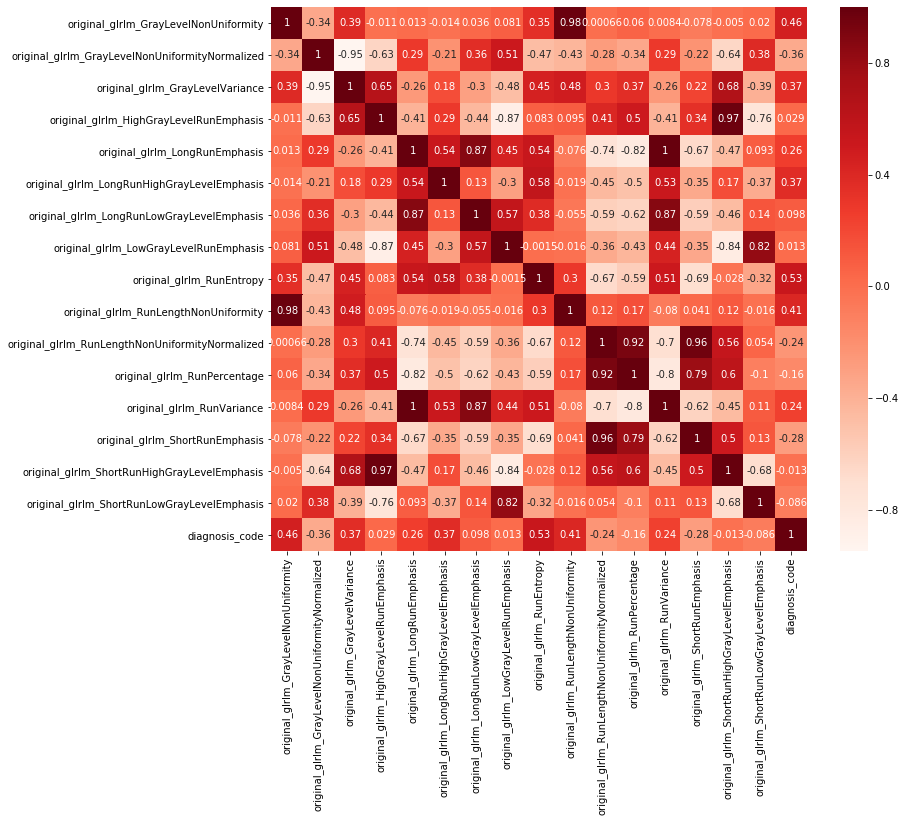

In [10]:
plt.figure(figsize=(12,10))
cor = dataset[glrlm_features].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
glrlm_data = dataset[glrlm_features]
glrlm_data.head()

,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,diagnosis_code
0,635.753957,0.386393,0.496164,8.268450,35.813432,288.762641,5.060246,0.158820,4.497523,311.977481,0.184203,0.260483,20.093459,0.395367,3.289589,0.068192,0
1,100.800524,0.442746,0.394778,4.750947,98.657191,397.543169,24.777872,0.334272,4.352583,33.633307,0.144202,0.162536,57.144109,0.357881,1.848319,0.162828,0
2,203.260491,0.371405,0.534773,8.789703,20.836573,162.810393,3.144840,0.151618,4.285351,119.509055,0.209518,0.315380,9.630667,0.425230,3.967911,0.065593,0
3,468.332549,0.441406,0.375363,6.396881,52.591406,280.362610,11.312171,0.213631,4.590949,161.579461,0.142472,0.230447,26.613673,0.313535,2.136343,0.075928,0
4,204.505786,0.402929,0.450018,5.116707,77.439949,316.954686,20.285264,0.323571,4.638538,76.931386,0.145197,0.184493,45.386818,0.353462,1.941529,0.142502,0


In [12]:
glrlm_data[glrlm_data['diagnosis_code'] == 0].describe()

,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,diagnosis_code
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,551.711601,0.416756,0.442949,6.196558,47.524911,209.308330,20.544122,0.308754,4.393237,256.146481,0.176891,0.261823,26.058261,0.369457,2.438738,0.117878,0.0
std,387.218917,0.045975,0.113395,2.616421,45.871180,91.210004,46.110417,0.178908,0.329743,222.440808,0.035840,0.055884,28.629774,0.065237,1.118161,0.069786,0.0
min,100.800524,0.334003,0.245753,2.322447,12.410876,27.829926,1.899530,0.095277,3.453645,33.633307,0.069234,0.092656,4.882039,0.158663,0.488802,0.035385,0.0
25%,289.862515,0.380381,0.346426,4.188462,25.956627,143.863511,4.395725,0.172615,4.214371,123.816039,0.158803,0.230148,12.401812,0.341448,1.554951,0.067953,0.0
50%,423.117993,0.410302,0.451140,6.405387,33.482815,205.089100,7.084375,0.211608,4.392225,187.480244,0.181637,0.266618,18.699466,0.380519,2.512678,0.085481,0.0
75%,660.283105,0.453290,0.518418,7.752661,52.612591,270.252856,15.437396,0.438787,4.598910,330.103947,0.196192,0.296145,27.571314,0.406973,3.130218,0.147583,0.0
max,2113.417262,0.508493,0.727746,13.012965,338.553964,397.543169,327.696453,0.669388,5.323160,1368.448612,0.267878,0.415153,208.853959,0.496419,4.962876,0.309706,0.0


In [44]:
mean_glrlm = [
    glrlm_data[glrlm_data['diagnosis_code'] == i] for i in range(glrlm_data['diagnosis_code'].max())
]
mean_glrlm

AttributeError: 'list' object has no attribute 'head'

9


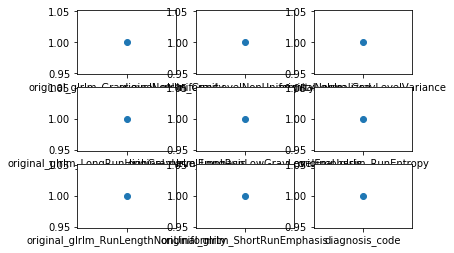

In [6]:
mean = glrlm_data[glrlm_data['diagnosis_code'] == 0].describe().loc[['mean'], :]

print(len(mean.columns))
for i, feature in enumerate(mean.columns):
    ax = plt.subplot(3, 3, i + 1)
    plt.scatter(feature, 1)

In [38]:
glrlm_data[glrlm_data['diagnosis_code'] == 1].describe()

,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_ShortRunEmphasis,diagnosis_code
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,2256.598524,0.312596,0.878396,278.757662,9.763975,4.751857,1414.328049,0.394197,1.0
std,2941.227685,0.041296,0.223478,138.614817,12.323048,0.129493,1778.773470,0.042514,0.0
min,329.960200,0.249279,0.566151,129.397264,1.144862,4.570960,329.249911,0.333999,1.0
25%,881.415242,0.279167,0.720847,191.248812,2.208614,4.637895,520.954213,0.372221,1.0
50%,966.660837,0.325255,0.843401,246.843718,3.359524,4.768236,775.268180,0.383631,1.0
75%,1926.245431,0.340197,1.043659,320.651437,12.701220,4.850832,1207.913200,0.422287,1.0
max,9150.149029,0.362407,1.196079,562.059184,35.249548,4.923980,5664.026765,0.465005,1.0


In [39]:
glrlm_data[glrlm_data['diagnosis_code'] == 2].describe()

,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_ShortRunEmphasis,diagnosis_code
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,1629.927598,0.360177,0.601606,293.467622,4.374259,4.583289,917.011999,0.370565,2.0
std,403.219533,0.024029,0.094894,98.375934,1.641413,0.101671,307.770884,0.029991,0.0
min,1229.264162,0.319510,0.547493,181.124394,2.498426,4.499415,671.367573,0.332569,2.0
25%,1313.783682,0.358265,0.548660,199.680980,2.761561,4.512927,705.486302,0.358709,2.0
50%,1509.207727,0.368864,0.566033,319.815360,5.058949,4.524208,747.141931,0.370892,2.0
75%,1937.861177,0.376057,0.575840,368.537216,5.417125,4.650453,1075.029963,0.375492,2.0
max,2159.521240,0.378189,0.770005,398.180160,6.135233,4.729441,1386.034224,0.415165,2.0


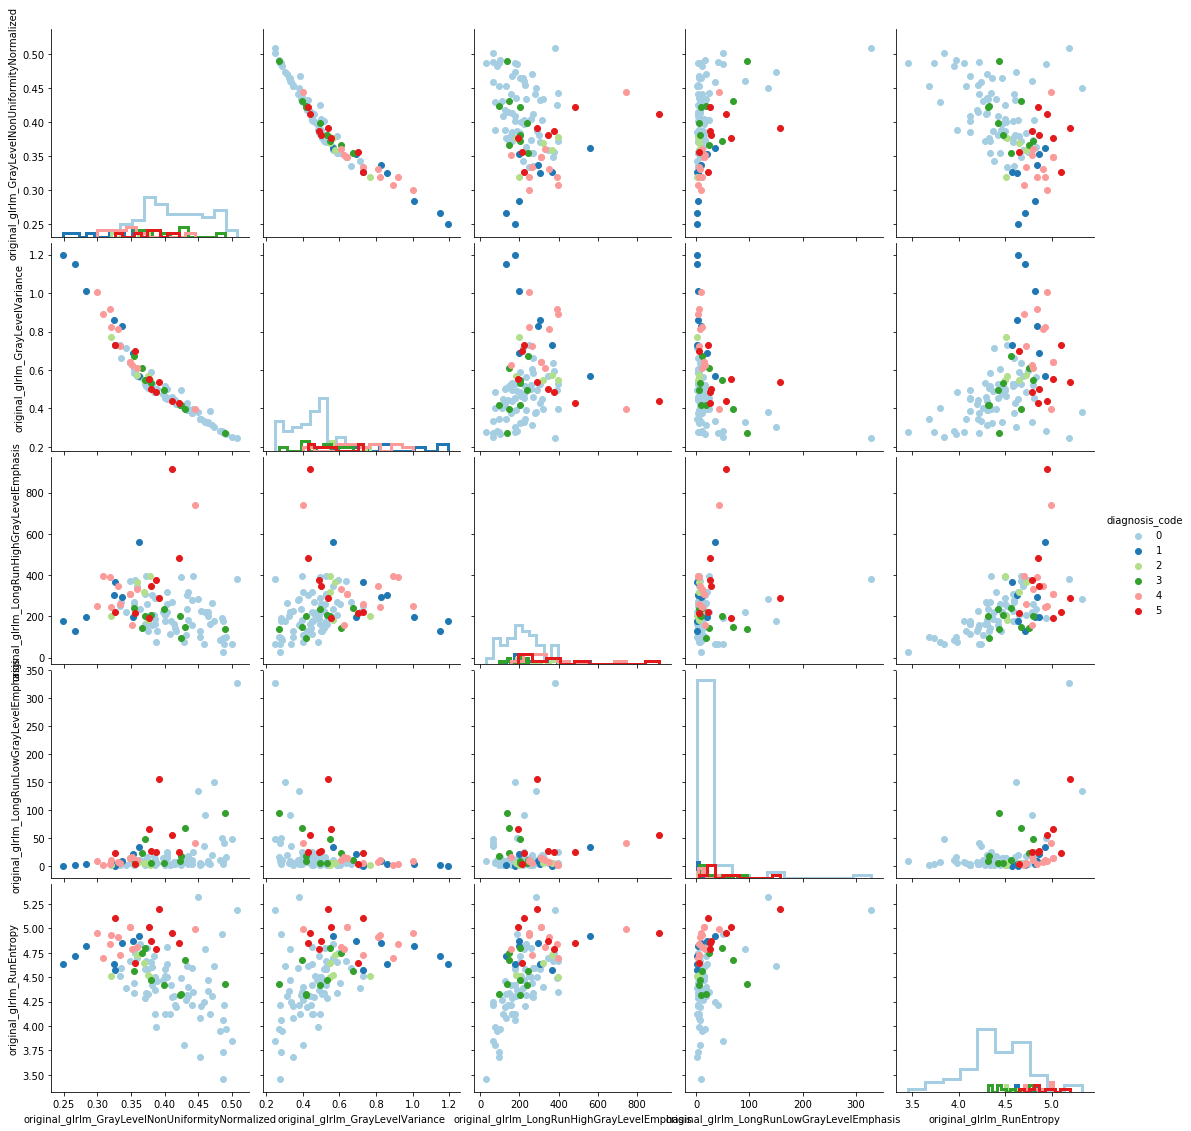

In [34]:
import seaborn as sns
# sns.pairplot(glrlm_data.iloc[:, :-1])
g = sns.PairGrid(glrlm_data,
                 vars=[
                        'original_glrlm_GrayLevelNonUniformityNormalized',
                        'original_glrlm_GrayLevelVariance',
                        'original_glrlm_LongRunHighGrayLevelEmphasis',
                        'original_glrlm_LongRunLowGrayLevelEmphasis',
                        'original_glrlm_RunEntropy'
                 ],
                 hue='diagnosis_code',
                 height=10,
                 aspect=0.6,
                 palette="Paired")
# g.map_diag(sns.kdeplot)
# g.map_offdiag(plt.scatter)
# g.map(plt.scatter)
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.fig.set_size_inches(15,15)

g.map_offdiag(plt.scatter)
g.add_legend()
# g.map_offdiag(sns.kdeplot, n_levels=3)

# Data preparation

In [19]:
X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]
seed = 2
test_size = 0.25

# MLP Model

In [24]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

clf = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(1,), random_state=seed, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print(clf.pvalues)


Accuracy: 71.43%


AttributeError: 'MLPClassifier' object has no attribute 'pvalues'

# Naive Bayes Model

In [48]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

model = GaussianNB()

model.fit(X_train, y_train)

print(accuracy_score(y_test, model.predict(X_test)))

0.7142857142857143


# K-Nearest Neighbours

In [49]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
neig = KNeighborsClassifier(n_neighbors=5)
neig.fit(X_train, y_train)
prob = neig.predict_proba(X_test)
pred = neig.predict(X_test)
# print(prob)
# print(pred)

accuracy = accuracy_score(y_test, neig.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%


# Support Vector Machine

In [57]:
from sklearn import svm
# dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
# dataset = dataset[dataset['isPatho'] <= 1]

X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.64%


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
model_res = clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.73%


/Users/ikachko/vcub/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikachko/vcub/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# XGBoost

TP: 68, FN: 0, TN: 41, FP: 0
Sensitivity: 100.0%, Specifity: 100.0%, Accuracy: 100.0%, Average: 100.0%


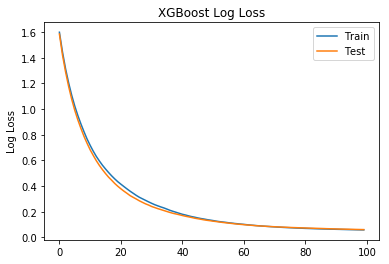

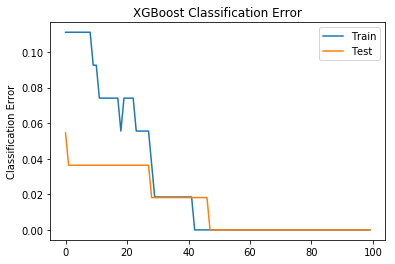

In [44]:
imp_glrlm_data = glrlm_data[important_features]

X = imp_glrlm_data.iloc[:, :-1]
Y = imp_glrlm_data.iloc[:, -1]

model = XGBClassifier()

seed = 2
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(X, Y, eval_metric=["merror","mlogloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions) * 100
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

sens, spec = calculate_sensitivity_and_specifity(model.predict(X), Y)
print("Sensitivity: {}%, Specifity: {}%, Accuracy: {}%, Average: {}%".format(
    sens,
    spec,
    accuracy,
    (sens + spec + accuracy)/3
))

# retrieve performance metrics
results = model.evals_result()

# print(results)

epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [17]:
def calculate_sensitivity_and_specifity(predictions, y):
    TP = 0
    FN = 0
    TN = 0
    FP = 0
    for p, yi in zip(predictions, y):
        if yi == 0 and p == 0:
            TP += 1
        elif yi == p:
            TN += 1
        elif yi == 0 and p != 0:
            FN += 1
        elif yi != 0 and p == 0:
            FP += 1
    
    print('TP: {}, FN: {}, TN: {}, FP: {}'.format(
        TP,
        FN,
        TN,
        FP
    ))
    return (TP * 100) / (TP + FN), (TN * 100) / (FP + TN)

[0.981965   0.00246115 0.00770115 0.00416451 0.00173517 0.00197302]
3


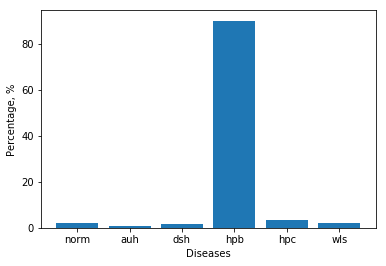

Accuracy: 100.00%


In [7]:


X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]

test_size = 0.5

model = XGBClassifier()

acc = []
diseases = [
    "norm",
    "auh",
    "dsh",
    "hpb",
    "hpc",
    "wls"
]

dis_dict = {
    0: "norm",
    1: "auh",
    2: "dsh",
    3: "hpb",
    4: "hpc",
    5: "wls"
}
seed = 2
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)



model.fit(X, Y)

import pickle

pickle.dump(model, open('./data/models/xgb_glrlm.pickle.dat', 'wb'))


# for j in range(1):
#     r = random.randint(0, len(y_pred) - 1)

#     print("Real value -> ", dis_dict[int(Y[r])])
#     for idx, y in enumerate(y_pred[r]):
#         print('{} : {}%'.format(diseases[idx], y))
    
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)

y_pred = model.predict_proba(X)
print(y_pred[0])

acc.append(accuracy)

ax = plt.subplot(111)
print(Y[89])
ax.bar(diseases, y_pred[89] * 100)
plt.xlabel('Diseases')
plt.ylabel('Percentage, %')
plt.show()
print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [46]:

dataset.head()

,Unnamed: 0,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Spacing,...,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,data_source,diagnosis_code
0,0,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},532c2722ef4f92d11ceb0b1bb85f172440374e50,"(1.0, 1.0, 1.0)",...,8.161551,51.714241,418.881804,7.374962,0.147512,0.040513,0.334705,0.007213,norm0,0
1,1,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},81c154e43651cc2312ea4c01d87687bb956d30ea,"(1.0, 1.0, 1.0)",...,4.210489,62.732759,255.257902,15.737328,0.265226,0.035035,0.150014,0.015960,norm1,0
2,2,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},cf9eccc619d960da1f02d899f508ac46765b8c2b,"(1.0, 1.0, 1.0)",...,8.213710,46.086406,361.819700,6.974095,0.151106,0.048266,0.435101,0.008119,norm2,0
3,3,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},14883c60a74c7fec46aa2200e4ed5e56724740a3,"(1.0, 1.0, 1.0)",...,5.889325,54.723312,309.878431,11.317346,0.207536,0.032941,0.206172,0.008569,norm3,0
4,4,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e2b4acbbf250bcc251d4718fc509438bb546e57e,"(1.0, 1.0, 1.0)",...,4.435496,60.235423,253.794825,16.265531,0.280230,0.034897,0.166367,0.014343,norm4,0


In [27]:
# dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
# dataset = dataset[dataset['isPatho'] <= 1]
X = glrlm_data.iloc[:, :-1]
Y = glrlm_data.iloc[:, -1]
# print(X)
seed = 123
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 75.00%


In [29]:
from sklearn import svm
# dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
# dataset = dataset[dataset['isPatho'] <= 1]

X = glrlm_data.iloc[:, 1:-1]
Y = glrlm_data.iloc[:, -1]
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.18%


In [ ]:
predicted = clf.predict(X_test)

def calc_accuracy(predicted, y_test):
    if len(predicted) != len(y_test):
        print("Function parameters must be the same size!")
        return

    true_answers = sum(int(predicted[i] == y_test[i]) for i in range(len(y_test)))
    
    return float(true_answers/float(len(y_test)))

calc_accuracy(predicted, y_test.values)


In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('./datasets/glrlm_0_unit.csv', sep=',', index_col=0).sample(frac=1)

seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
svc = svm.SVC(kernel='linear', gamma=.004, C=100)
svc.fit(X_train, y_train)

NameError: name 'X' is not defined

In [ ]:
dataset = pd.read_csv('./datasets/glrlm_0_unit.csv', sep=',', index_col=0).sample(frac=1)
X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]

seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
clf = svm.SVC(gamma='scale')
clf.fit(X, y)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train) 

In [ ]:
X_train